In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

x.shape = (100, 2)
y.shape = (100, 2)


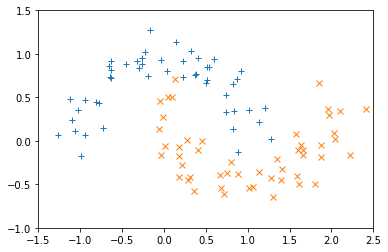

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

print("x.shape = {}".format(x.shape))
print("y.shape = {}".format(x.shape))

def plot_data(axis):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], '+')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'x')
    plt.axis(axis)
    
plt.figure()
plot_data([-1.5, 2.5, -1, 1.5])
plt.show()

## poly feature

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

poly_feature_clf = Pipeline([
        ('poly_features', PolynomialFeatures(degree=3)),
        ('scaler', StandardScaler()),
        ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
    ])

poly_feature_clf.fit(x, y)

d:\Dev\Miniconda3\envs\tf\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [4]:
def plot_boundary(clf, axis):
    x0s = np.linspace(axis[0], axis[1], 100)
    x1s = np.linspace(axis[2], axis[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_hat = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_hat, alpha=0.2)
    plt.contourf(x0, x1, y_decision, alpha=0.1)

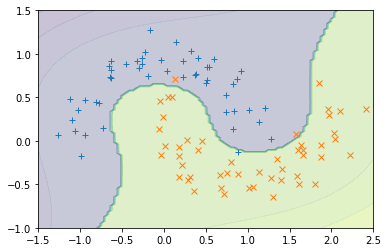

In [5]:
plt.figure()
plot_boundary(poly_feature_clf, [-1.5, 2.5, -1, 1.5])
plot_data([-1.5, 2.5, -1, 1.5])
plt.show()

## poly kernel

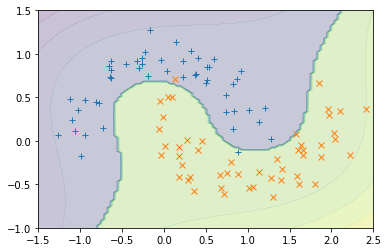

In [6]:
from sklearn.svm import SVC

poly_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_clf.fit(x, y)

plt.figure()
plot_boundary(poly_kernel_clf, [-1.5, 2.5, -1, 1.5])
plot_data([-1.5, 2.5, -1, 1.5])
plt.show()

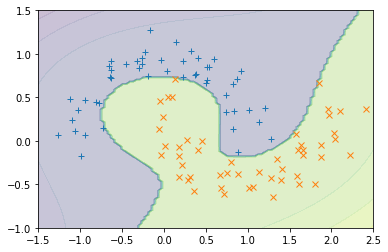

In [7]:
poly_100_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])

poly_100_kernel_clf.fit(x, y)

plt.figure()
plot_boundary(poly_100_kernel_clf, [-1.5, 2.5, -1, 1.5])
plot_data([-1.5, 2.5, -1, 1.5])
plt.show()

## RBF

In [8]:
import itertools

params_gamma = [0.1, 5]
params_c = [0.001, 1000]
params = list(itertools.product(params_gamma, params_c))

clfs = []
for gamma, c in params:
    rbf_kernel_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=c))
    ])
    rbf_kernel_clf.fit(x, y)
    clfs.append(rbf_kernel_clf)

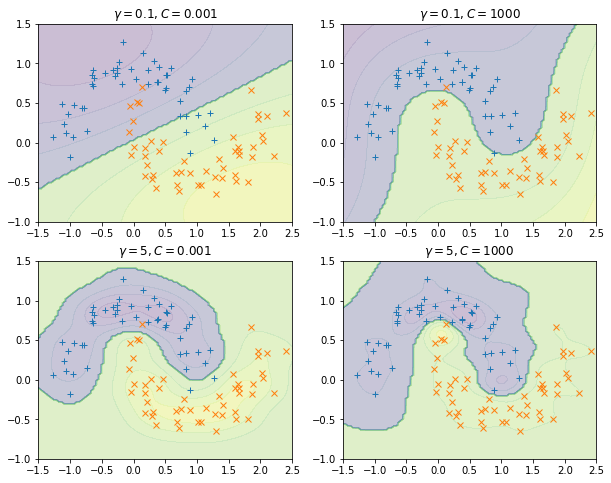

In [9]:
plt.figure(figsize=(10, 8))
for i, clf in enumerate(clfs):
    plt.subplot(2, 2, i + 1)
    plot_boundary(clf, [-1.5, 2.5, -1, 1.5])
    plot_data([-1.5, 2.5, -1, 1.5])
    plt.title(r"$\gamma = {}, C = {}$".format(params[i][0], params[i][1]))